### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [8]:
import numpy as np

image1 = np.load("/Users/kostas/Desktop/indian_pines_corrected.npy")



1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [9]:
image2 = np.load("/Users/kostas/Desktop/indian_pines_gt.npy")


### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

height:  145
width:  145
channels:  200


Matplotlib is building the font cache; this may take a moment.


number of characters:  17
Category 1: 10776 pixels
Category 2: 46 pixels
Category 3: 1428 pixels
Category 4: 830 pixels
Category 5: 237 pixels
Category 6: 483 pixels
Category 7: 730 pixels
Category 8: 28 pixels
Category 9: 478 pixels
Category 10: 20 pixels
Category 11: 972 pixels
Category 12: 2455 pixels
Category 13: 593 pixels
Category 14: 205 pixels
Category 15: 1265 pixels
Category 16: 386 pixels
Category 17: 93 pixels


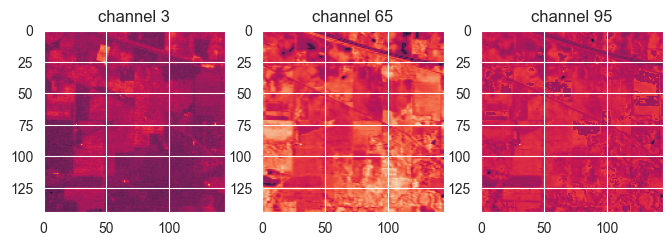

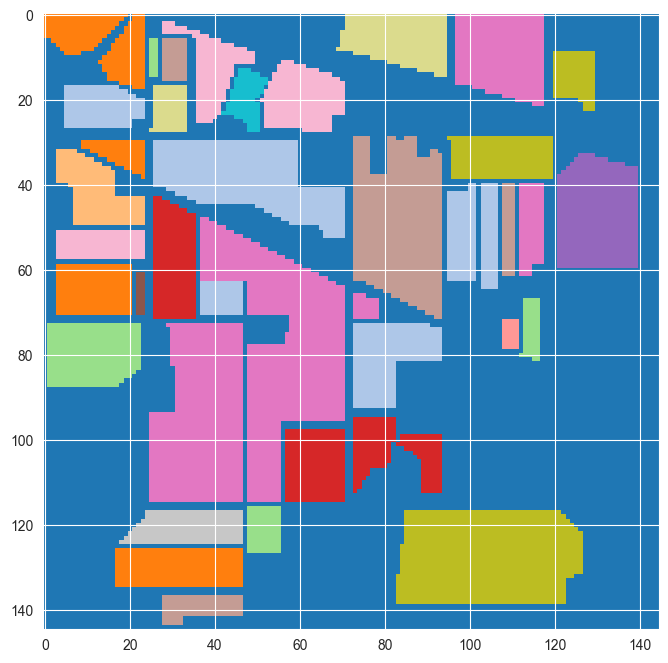

In [10]:
import matplotlib.pyplot as plt 

height,width,channels = image1.shape

print("height: ",height)
print("width: " ,width)
print("channels: ",channels)

channel_3=image1[:,:,3]
channel_65=image1[:,:,65]
channel_95=image1[:,:,95]

plt.figure(figsize=(8,6))
plt.subplot(1,3,1)
plt.imshow(channel_3)
plt.title("channel 3")

plt.subplot(1,3,2)
plt.imshow(channel_65)
plt.title("channel 65")

plt.subplot(1,3,3)
plt.imshow(channel_95)
plt.title("channel 95")

flattened_image = image2.flatten()
unique_categories = np.unique(flattened_image)
number_of_characters = len(unique_categories)
print("number of characters: ", number_of_characters)

classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

plt.figure(figsize=(10, 8))
plt.imshow(image2, cmap='tab20',vmin=1,vmax=number_of_characters)

pixel_counts = np.bincount(flattened_image)

for i, count in enumerate(pixel_counts, start=1):
    print(f"Category {i}: {count} pixels")





### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

In [11]:
number_of_pixels=height * width


image1_2d=image1.reshape(number_of_pixels,channels)

image2_2d=image2.flatten()
image2_2d=image2[image2!=0]-1
unique_categories = np.unique(image2_2d)
print(len(unique_categories))

print(image1_2d.shape)
print(image2_2d.shape)
print(image2_2d)


16
(21025, 200)
(10249,)
[2 2 2 ... 9 9 9]


3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

In [12]:
import random 

random_pixels = []

for category in unique_categories:
    random_pixels.append(image1_2d[random.choice(np.where(image2_2d==category)[0])])

for i in random_pixels:
    print(i)

[2752 4376 4507 4344 4645 4973 5006 4896 4926 4735 4750 4687 4615 4758
 4827 4831 4686 4536 4420 4367 4301 4299 4232 4153 4080 3981 3832 3846
 3815 3638 4099 3631 4085 4735 4889 4917 5647 6151 6017 4292 6240 6405
 6252 6139 5817 5362 5705 6164 6146 6217 6130 6211 6073 5017 4815 4715
 4212 2536 2769 3057 3986 4690 5258 5617 5464 5510 5456 5430 5362 5339
 5176 5081 4986 4766 4235 2666 1975 1763 2125 2020 2664 2627 2795 2742
 3623 2751 3680 3752 3831 3828 3734 3264 2654 3584 3309 2748 2742 3298
 2950 2686 2105 1741 1113 1045 1083 1113 1122 1270 1345 1270 1372 1636
 1871 2043 2169 2210 2262 2267 2258 2138 2144 2187 2141 2153 2216 2214
 2149 2136 2129 2069 2056 1997 1943 1892 1849 1772 1728 1685 1640 1529
 1397 1295 1126 1041 1025 1044 1093 1187 1249 1205 1077 1095 1186 1284
 1264 1199 1202 1228 1275 1291 1286 1287 1282 1290 1288 1262 1258 1257
 1259 1255 1247 1267 1257 1249 1231 1199 1193 1179 1182 1163 1159 1154
 1148 1146 1125 1118 1115 1090 1094 1093 1093 1076 1074 1067 1057 1042
 1043 

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

16 200


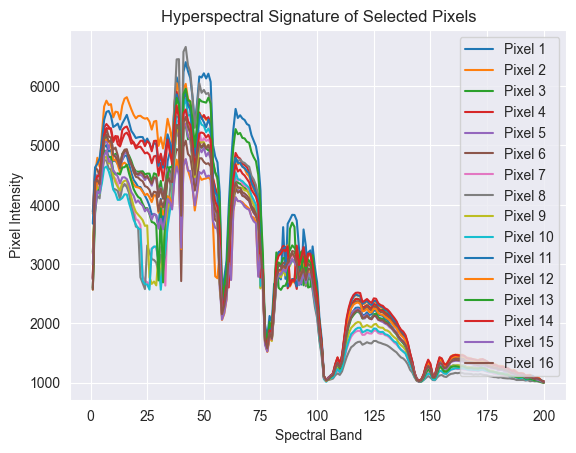

In [13]:
selected_pixels = np.array(random_pixels)
num_selected_pixels, num_channels = selected_pixels.shape
print(num_selected_pixels,num_channels)
for i in range(num_selected_pixels):
    plt.plot(range(1, num_channels + 1), selected_pixels[i, :], label=f'Pixel {i + 1}')


plt.title('Hyperspectral Signature of Selected Pixels')
plt.xlabel('Spectral Band')
plt.ylabel('Pixel Intensity')
plt.legend()
plt.show()

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

[2754 4256 4690 4571 4963 5330 5605 5469 5451 5250 5296 5284 5139 5399
 5424 5458 5394 5261 5235 5190 5236 5250 5215 5158 5183 5152 5032 5200
 5172 4796 4935 4700 4918 5212 5038 4893 5450 5735 5685 3948 5718 5838
 5585 5466 5065 4663 4961 5373 5292 5312 5235 5271 5176 4322 4107 4030
 3608 2279 2437 2672 2636 3996 4426 4721 4616 4588 4536 4506 4466 4415
 4309 4220 4124 3967 2773 2888 1745 1619 1897 1853 2384 3022 3180 3153
 3212 3245 3253 2604 2701 2649 3311 2967 3077 3229 2966 3172 3134 2988
 2657 2428 1975 1644 1120 1050 1079 1122 1152 1294 1435 1313 1446 1770
 2048 2236 2370 2433 2473 2487 2463 2318 2333 2374 2321 2301 2361 2364
 2297 2266 2256 2219 2199 2154 2118 2046 2002 1936 1867 1834 1780 1659
 1485 1366 1153 1062 1026 1053 1138 1266 1377 1308 1116 1121 1274 1429
 1411 1315 1304 1363 1429 1458 1466 1463 1465 1457 1446 1418 1408 1398
 1386 1381 1370 1390 1381 1371 1357 1325 1313 1296 1295 1274 1275 1276
 1256 1248 1221 1202 1203 1167 1167 1168 1163 1120 1127 1122 1099 1079
 1082 

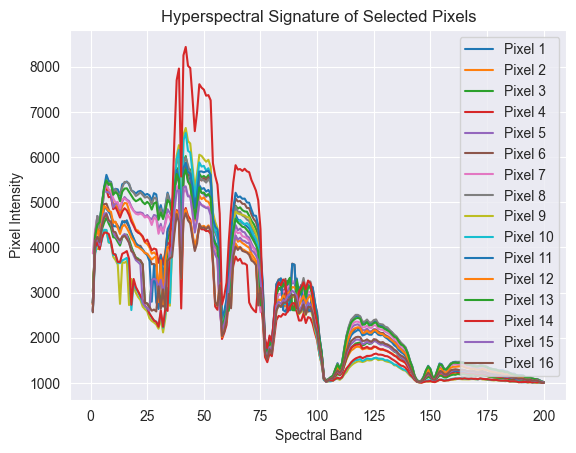

[2580 4124 4331 4182 4640 4860 5044 4811 4950 4689 4689 4680 4551 4699
 4784 4787 4709 4513 4404 4311 4294 4266 4200 4071 4066 3963 3809 3821
 3805 3625 4084 2813 4063 4640 4842 4778 5536 6048 5983 4179 6085 6319
 6045 6038 5604 5262 5654 6047 5984 6002 5941 6018 5921 4890 4710 4637
 4130 2478 2649 2951 3898 4562 5108 5478 5323 5359 5292 5293 5230 5213
 5007 4962 4840 4643 4138 3317 1940 1708 2085 1982 2564 3288 2695 2684
 2746 2726 2808 3680 3777 3750 3617 3210 3306 2736 3214 2695 2679 3239
 2883 2614 2087 1688 1122 1041 1071 1105 1122 1245 1337 1255 1372 1610
 1839 2011 2126 2197 2220 2247 2228 2116 2122 2152 2127 2131 2189 2189
 2143 2114 2106 2060 2031 1982 1926 1867 1829 1762 1712 1685 1631 1534
 1400 1282 1137 1056 1011 1029 1081 1174 1243 1200 1082 1083 1193 1273
 1258 1196 1190 1228 1263 1276 1289 1281 1283 1279 1280 1259 1255 1257
 1251 1243 1238 1258 1251 1240 1219 1204 1197 1175 1178 1155 1163 1147
 1143 1142 1114 1112 1116 1083 1091 1083 1087 1070 1059 1059 1050 1046
 1039 

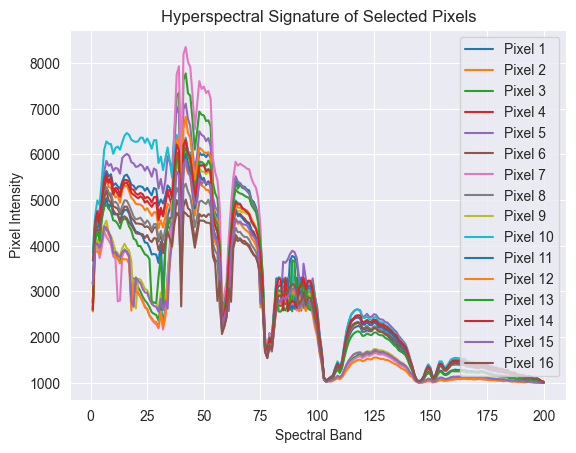

In [14]:


random_pixels = []

for category in unique_categories:
    random_pixels.append(image1_2d[random.choice(np.where(image2_2d==category)[0])])

for i in random_pixels:
    print(i)
selected_pixels = np.array(random_pixels)
num_selected_pixels, num_channels = selected_pixels.shape
print(num_selected_pixels,num_channels)
for i in range(num_selected_pixels):
    plt.plot(range(1, num_channels + 1), selected_pixels[i, :], label=f'Pixel {i + 1}')


plt.title('Hyperspectral Signature of Selected Pixels')
plt.xlabel('Spectral Band')
plt.ylabel('Pixel Intensity')
plt.legend()
plt.show()



random_pixels = []

for category in unique_categories:
    random_pixels.append(image1_2d[random.choice(np.where(image2_2d==category)[0])])

for i in random_pixels:
    print(i)

selected_pixels = np.array(random_pixels)
num_selected_pixels, num_channels = selected_pixels.shape
print(num_selected_pixels,num_channels)
for i in range(num_selected_pixels):
    plt.plot(range(1, num_channels + 1), selected_pixels[i, :], label=f'Pixel {i + 1}')


plt.title('Hyperspectral Signature of Selected Pixels')
plt.xlabel('Spectral Band')
plt.ylabel('Pixel Intensity')
plt.legend()
plt.show()

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

Comments concerning the results of different crops:

It is evident that every pixel within a class exhibits a distinct yet remarkably similar signature compared to others within the same class. This implies that pixels belonging to the same class share similar signatures. Additionally, a change in class results in a corresponding shift in the form of the signature, as signatures from different classes vary both in structure (spectral form) and numerical values.

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

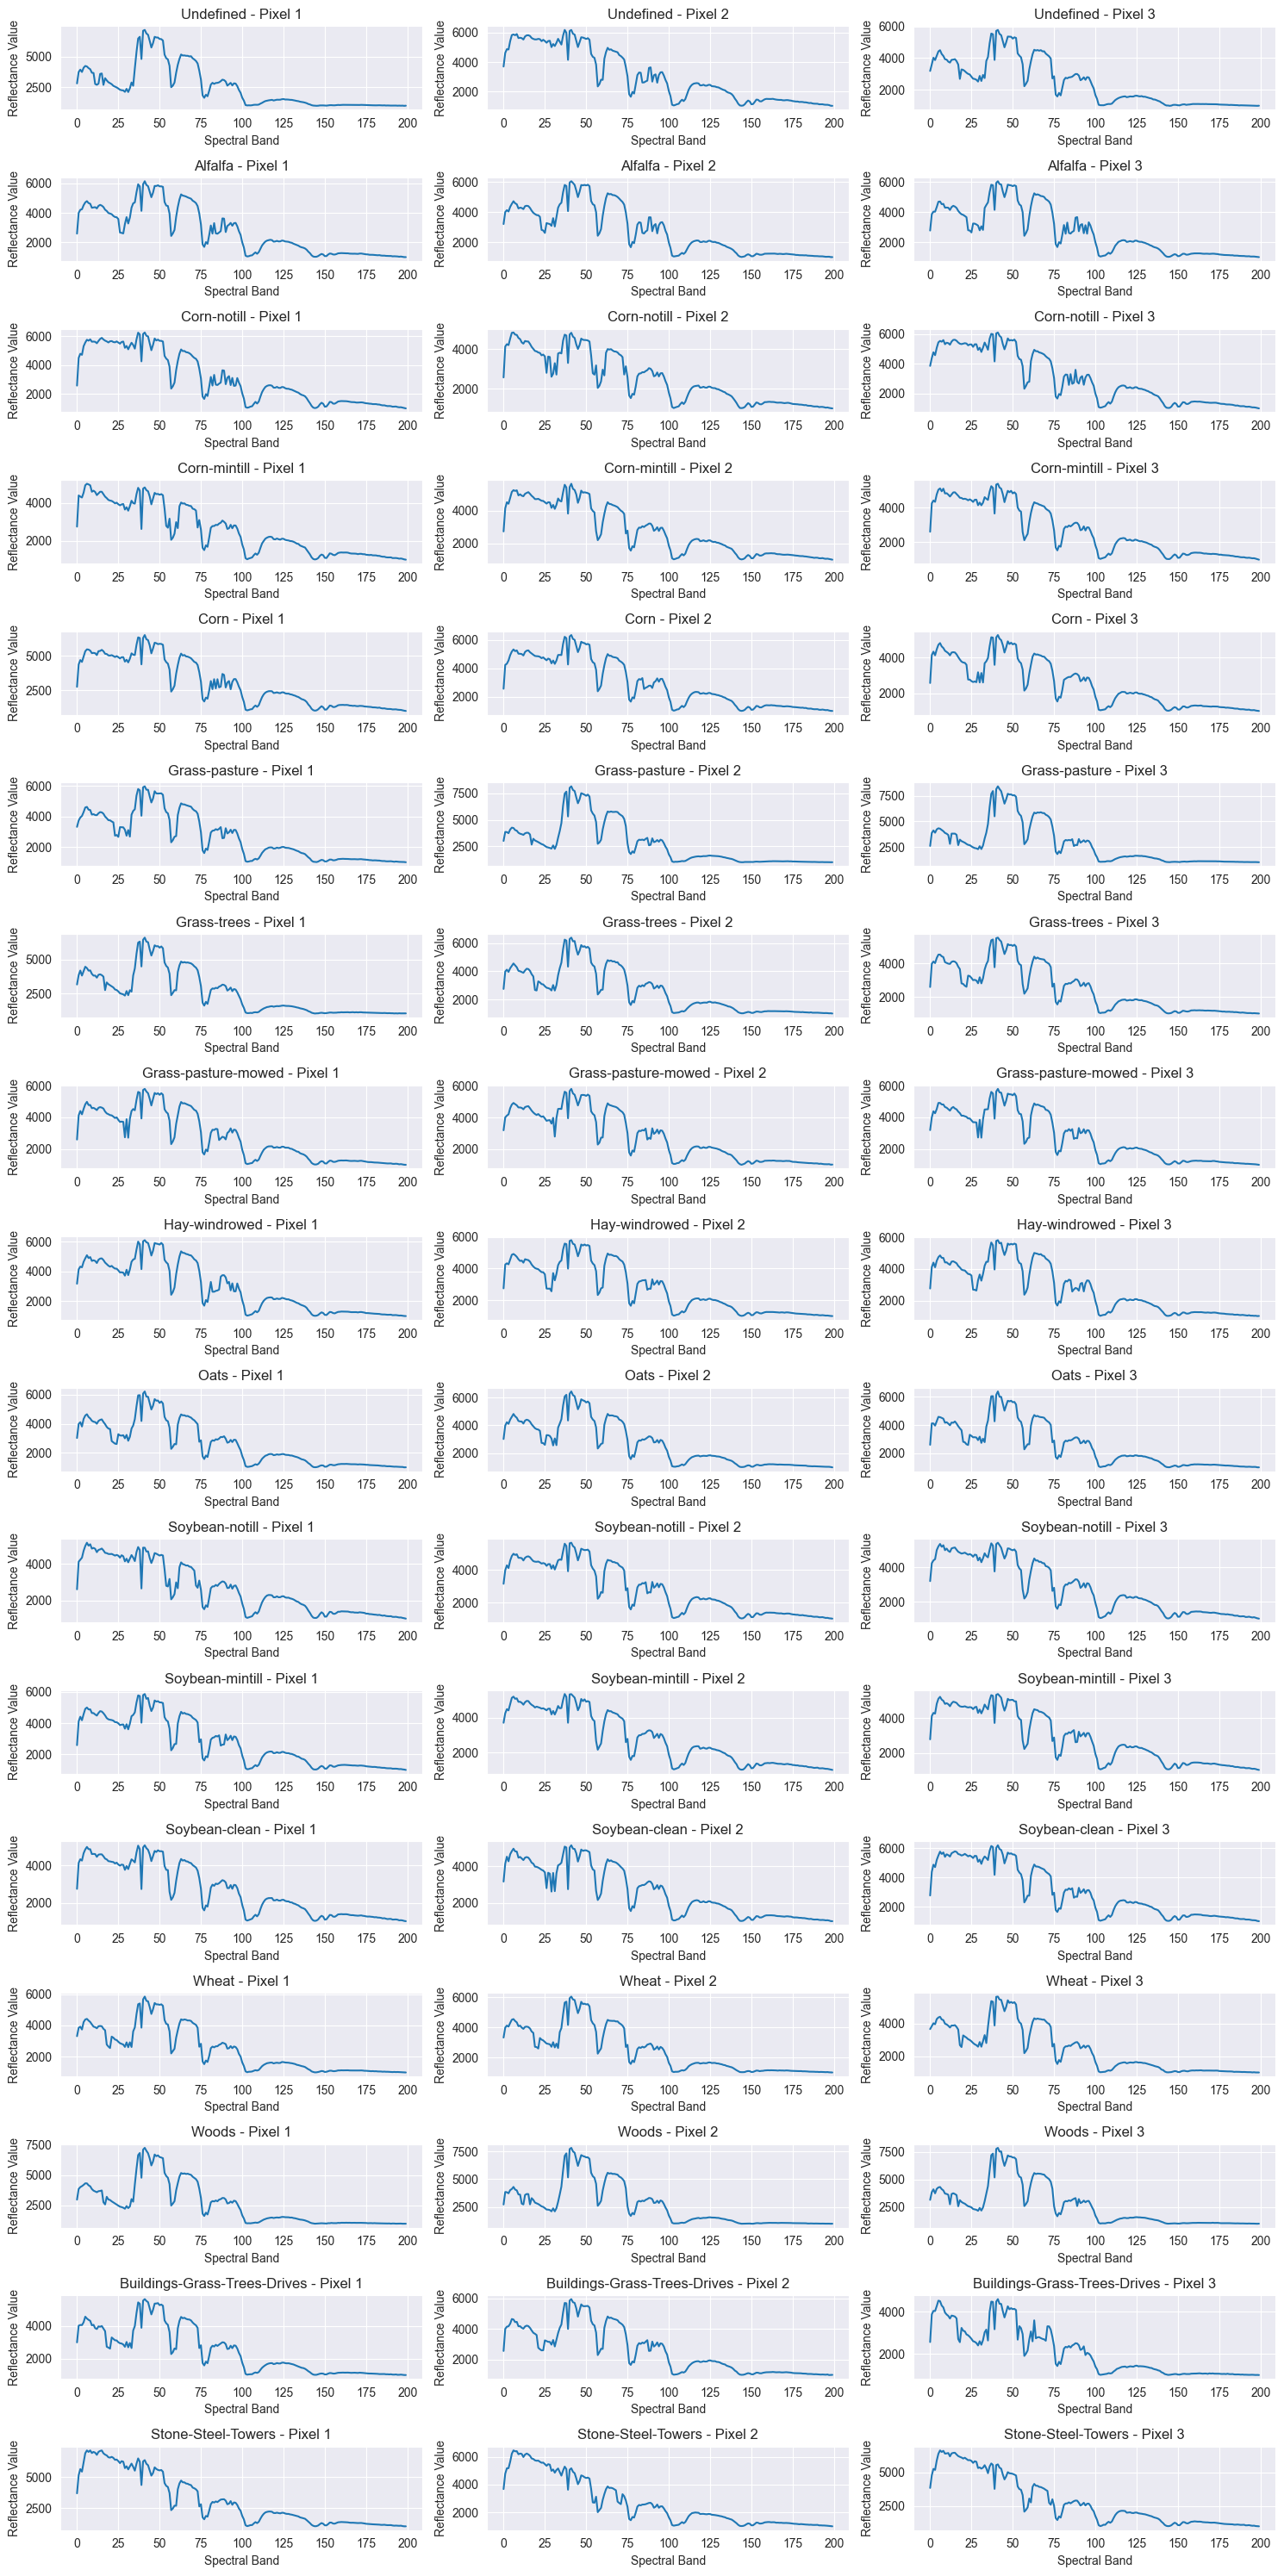

In [30]:
import matplotlib.pyplot as plt
from random import sample
hyperspectral_signatures = {}

#θα χρησιμοποιήσω dummy μόνο για αυτό το ερώτημα κατά τα άλλα είναι redundant
dummy1_img, dummy2_img = np.reshape(image1, (-1, 200)), np.reshape(image2, (-1))

for class_index, class_name in enumerate(classes):
    class_pixel_idxs = sample(list(np.where(dummy2_img == class_index)[0]), 3)

    hyperspectral_signatures[class_name] = {
        f"pixel{i + 1}": dummy1_img[idx] for i, idx in enumerate(class_pixel_idxs)
    }

fig, axes = plt.subplots(nrows=len(classes), ncols=3, figsize=(15, 30))

for i, class_name in enumerate(classes):
    for j in range(3):
        pixel_signature = hyperspectral_signatures[class_name][f"pixel{j + 1}"]
        axes[i, j].plot(pixel_signature)
        axes[i, j].set_title(f"{class_name} - Pixel {j + 1}")
        axes[i, j].set_xlabel("Spectral Band")
        axes[i, j].set_ylabel("Reflectance Value")
        axes[i, j].grid(True)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


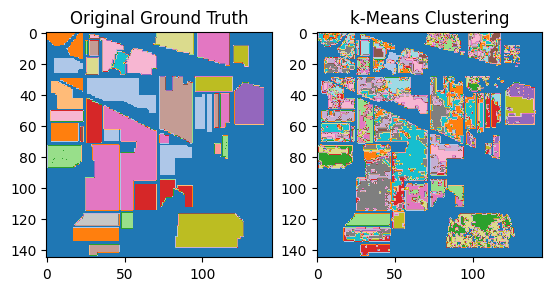

Unique categories in the masked image:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [10]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming image1, image2, height, width, and channels are already defined
image1_2d = image1.reshape((height * width, channels))

n_clusters = 16
image2_2d = image2.flatten()
mask = (image2_2d != 0)  # Create a mask to filter out undefined areas
image2_2d = image2_2d[mask] - 1  # Remove 0 labels and subtract 1 from the rest
image1_2d_masked = image1_2d[mask]

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(image1_2d_masked)

# Initialize a full-sized array with a default value (-1 or 0)
kmeans_image = np.full((height, width), -1, dtype=int)  # or dtype=labels.dtype

# Insert the labels into the full-sized array
kmeans_image[mask.reshape((height, width))] = labels

plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='tab20', vmin=1, vmax=number_of_characters)
plt.title('Original Ground Truth')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_image, cmap='tab20', vmin=0, vmax=n_clusters - 1)
plt.title('k-Means Clustering')

plt.show()

print("Unique categories in the masked image:")
unique_categories = np.unique(image2_2d)
print(unique_categories)


4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [13]:

from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

In [14]:
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score


# Print shapes
print(labels.shape)
print(image2.flatten().shape)

# Debugging
print(f"Unique values in labels: {np.unique(labels)}")

print(f"Unique values in labels: {np.unique(labels)}")
translated_labels=  translate_predicted_labels(labels, image2_2d)



acc = accuracy_score(image2_2d, translated_labels)

print(acc)

rand_score = adjusted_rand_score(image2_2d,labels)

print(rand_score)

sil_score = silhouette_score(image1_2d_masked, labels)

print(sil_score)




(10249,)
(21025,)
Unique values in labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Unique values in labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
map: 0 --> 14
map: 1 --> 15
map: 2 --> 9
map: 3 --> 4
map: 4 --> 12
map: 5 --> 3
map: 6 --> 7
map: 7 --> 11
map: 8 --> 8
map: 9 --> 5
map: 10 --> 1
map: 11 --> 10
map: 12 --> 6
map: 13 --> 13
map: 14 --> 2
map: 15 --> 0
0.34735096106937263
0.20385337950804414
0.2838124536963247


4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

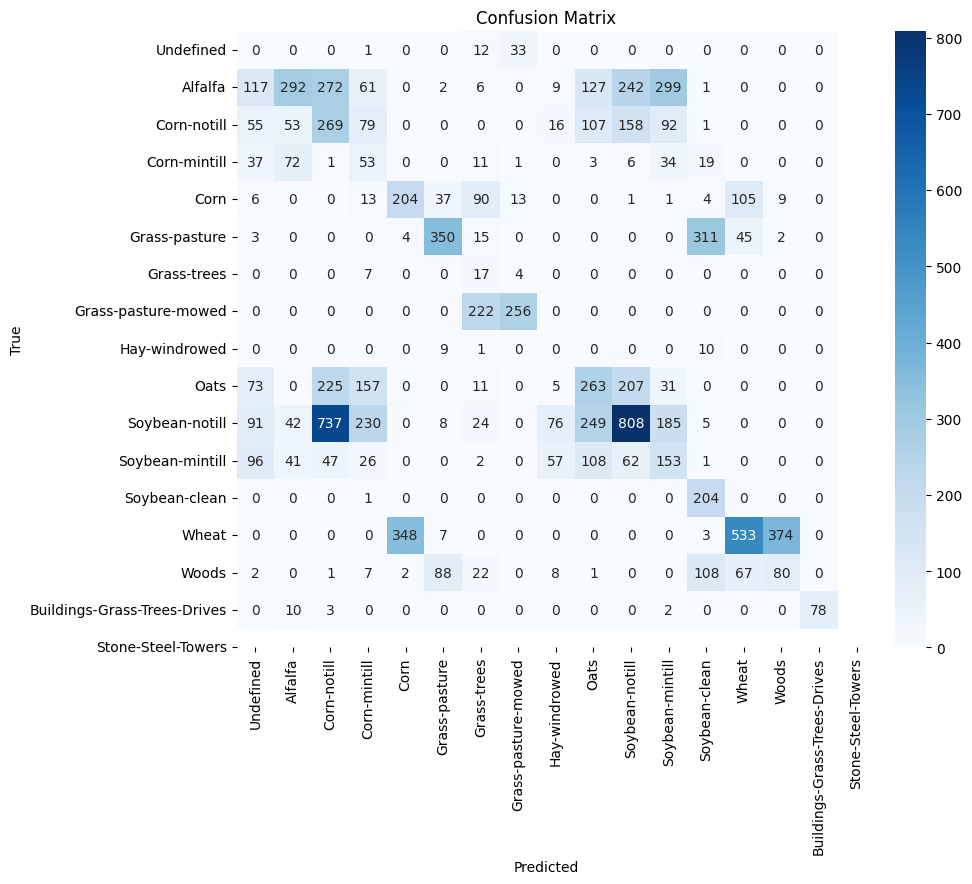

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(image2_2d, translated_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

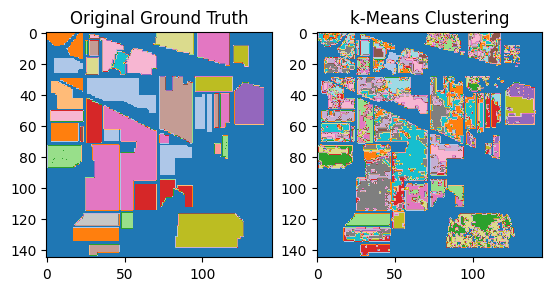

In [16]:
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='tab20', vmin=1, vmax=number_of_characters)
plt.title('Original Ground Truth')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_image, cmap='tab20', vmin=0, vmax=n_clusters - 1)
plt.title('k-Means Clustering')

plt.show()

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

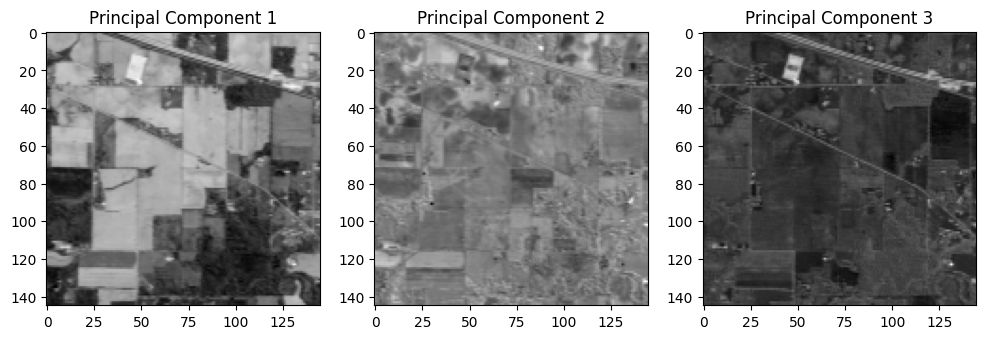

In [17]:
from sklearn.decomposition import PCA

# Assuming image1 is your hyperspectral data
# Reshape the data to 2D, where each row corresponds to a pixel and each column to a spectral band
image1_2d = image1.reshape((height * width, channels))

# Apply PCA with n_components=3
n_components = 3
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(image1_2d)

# Visualize the first three principal components
plt.figure(figsize=(12, 6))
for i in range(n_components):
    plt.subplot(1, n_components, i + 1)
    plt.imshow(pca_result[:, i].reshape(height, width), cmap='gray')
    plt.title(f'Principal Component {i + 1}')
plt.show()


5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [18]:
from sklearn.decomposition import PCA

# Assuming image1 is your hyperspectral data
# Reshape the data to 2D, where each row corresponds to a pixel and each column to a spectral band
image1_2d = image1.reshape((height * width, channels))

# Apply PCA with n_components=3
n_components = 3
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(image1_2d)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance for each principal component
for i in range(n_components):
    print(f"Explained Variance for Principal Component {i + 1}: {explained_variance_ratio[i]:.2%}")

# Print the total explained variance
total_explained_variance = explained_variance_ratio.sum()
print(f"\nTotal Explained Variance with {n_components} Components: {total_explained_variance:.2%}")


Explained Variance for Principal Component 1: 68.49%
Explained Variance for Principal Component 2: 23.53%
Explained Variance for Principal Component 3: 1.50%

Total Explained Variance with 3 Components: 93.52%


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


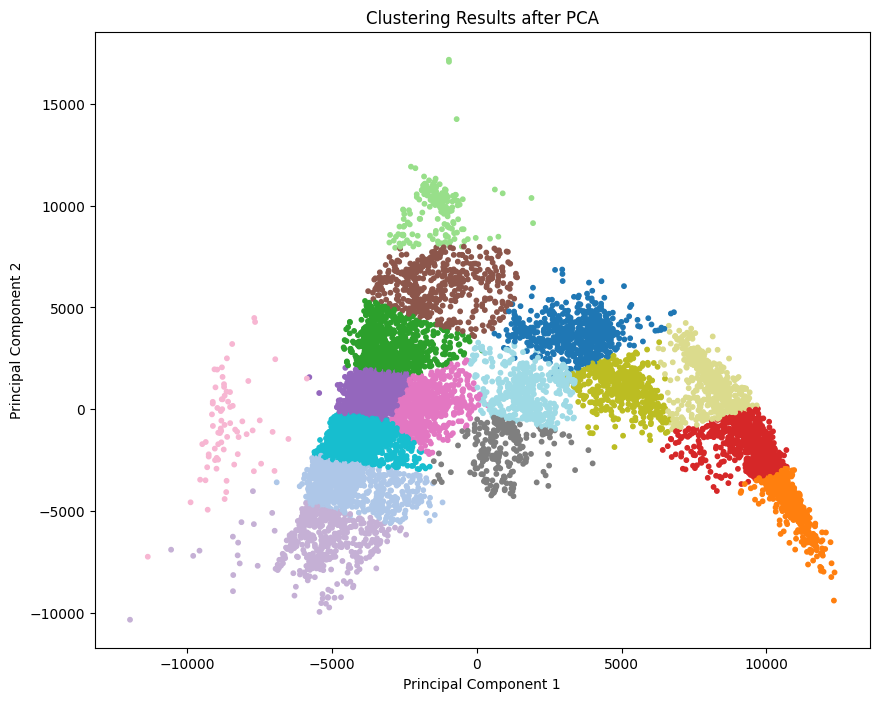

map: 0 --> 12
map: 1 --> 1
map: 2 --> 4
map: 3 --> 9
map: 4 --> 8
map: 5 --> 13
map: 6 --> 2
map: 7 --> 3
map: 8 --> 11
map: 9 --> 6
map: 10 --> 15
map: 11 --> 0
map: 12 --> 5
map: 13 --> 14
map: 14 --> 10
map: 15 --> 7

Metrics after PCA:
Accuracy: 0.3449
Adjusted Rand Score: 0.2017
Silhouette Score: 0.3749


In [19]:
n_components = 3
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(image1_2d_masked)

# Apply k-means on the reduced dimensionality data
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_result)

# Visualize the clustering results
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels_pca, cmap='tab20', s=10)
plt.title('Clustering Results after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluate the clustering results after PCA
translated_labels_pca = translate_predicted_labels(labels_pca, image2_2d)

acc_pca = accuracy_score(image2_2d, translated_labels_pca)
rand_score_pca = adjusted_rand_score(image2_2d, labels_pca)
sil_score_pca = silhouette_score(pca_result, labels_pca)

# Print the metrics after PCA
print(f"\nMetrics after PCA:")
print(f"Accuracy: {acc_pca:.4f}")
print(f"Adjusted Rand Score: {rand_score_pca:.4f}")
print(f"Silhouette Score: {sil_score_pca:.4f}")

6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 11
map: 1 --> 13
map: 2 --> 0
map: 3 --> 9
map: 4 --> 1
map: 5 --> 6
map: 6 --> 14
map: 7 --> 4
map: 8 --> 12
map: 9 --> 2
map: 10 --> 15
map: 11 --> 3
map: 12 --> 7
map: 13 --> 5
map: 14 --> 8
map: 15 --> 10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 12
map: 1 --> 0
map: 2 --> 13
map: 3 --> 9
map: 4 --> 15
map: 5 --> 11
map: 6 --> 5
map: 7 --> 3
map: 8 --> 1
map: 9 --> 14
map: 10 --> 8
map: 11 --> 10
map: 12 --> 6
map: 13 --> 4
map: 14 --> 2
map: 15 --> 7


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 12
map: 1 --> 1
map: 2 --> 4
map: 3 --> 9
map: 4 --> 8
map: 5 --> 13
map: 6 --> 2
map: 7 --> 3
map: 8 --> 11
map: 9 --> 6
map: 10 --> 15
map: 11 --> 0
map: 12 --> 5
map: 13 --> 14
map: 14 --> 10
map: 15 --> 7


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 11
map: 1 --> 13
map: 2 --> 3
map: 3 --> 5
map: 4 --> 12
map: 5 --> 10
map: 6 --> 0
map: 7 --> 1
map: 8 --> 4
map: 9 --> 7
map: 10 --> 2
map: 11 --> 9
map: 12 --> 8
map: 13 --> 15
map: 14 --> 6
map: 15 --> 14


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 9
map: 1 --> 13
map: 2 --> 3
map: 3 --> 12
map: 4 --> 11
map: 5 --> 7
map: 6 --> 6
map: 7 --> 5
map: 8 --> 0
map: 9 --> 4
map: 10 --> 10
map: 11 --> 1
map: 12 --> 2
map: 13 --> 14
map: 14 --> 8
map: 15 --> 15


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 14
map: 1 --> 2
map: 2 --> 6
map: 3 --> 13
map: 4 --> 7
map: 5 --> 1
map: 6 --> 12
map: 7 --> 9
map: 8 --> 11
map: 9 --> 4
map: 10 --> 3
map: 11 --> 5
map: 12 --> 10
map: 13 --> 15
map: 14 --> 0
map: 15 --> 8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 2
map: 1 --> 13
map: 2 --> 12
map: 3 --> 10
map: 4 --> 1
map: 5 --> 8
map: 6 --> 7
map: 7 --> 0
map: 8 --> 14
map: 9 --> 3
map: 10 --> 11
map: 11 --> 6
map: 12 --> 15
map: 13 --> 5
map: 14 --> 9
map: 15 --> 4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 6
map: 1 --> 9
map: 2 --> 4
map: 3 --> 1
map: 4 --> 0
map: 5 --> 10
map: 6 --> 14
map: 7 --> 5
map: 8 --> 15
map: 9 --> 2
map: 10 --> 8
map: 11 --> 11
map: 12 --> 7
map: 13 --> 13
map: 14 --> 12
map: 15 --> 3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 14
map: 1 --> 10
map: 2 --> 0
map: 3 --> 13
map: 4 --> 6
map: 5 --> 1
map: 6 --> 9
map: 7 --> 7
map: 8 --> 2
map: 9 --> 12
map: 10 --> 15
map: 11 --> 5
map: 12 --> 11
map: 13 --> 8
map: 14 --> 3
map: 15 --> 4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


map: 0 --> 6
map: 1 --> 2
map: 2 --> 14
map: 3 --> 1
map: 4 --> 0
map: 5 --> 7
map: 6 --> 9
map: 7 --> 4
map: 8 --> 5
map: 9 --> 11
map: 10 --> 15
map: 11 --> 3
map: 12 --> 12
map: 13 --> 8
map: 14 --> 10
map: 15 --> 13


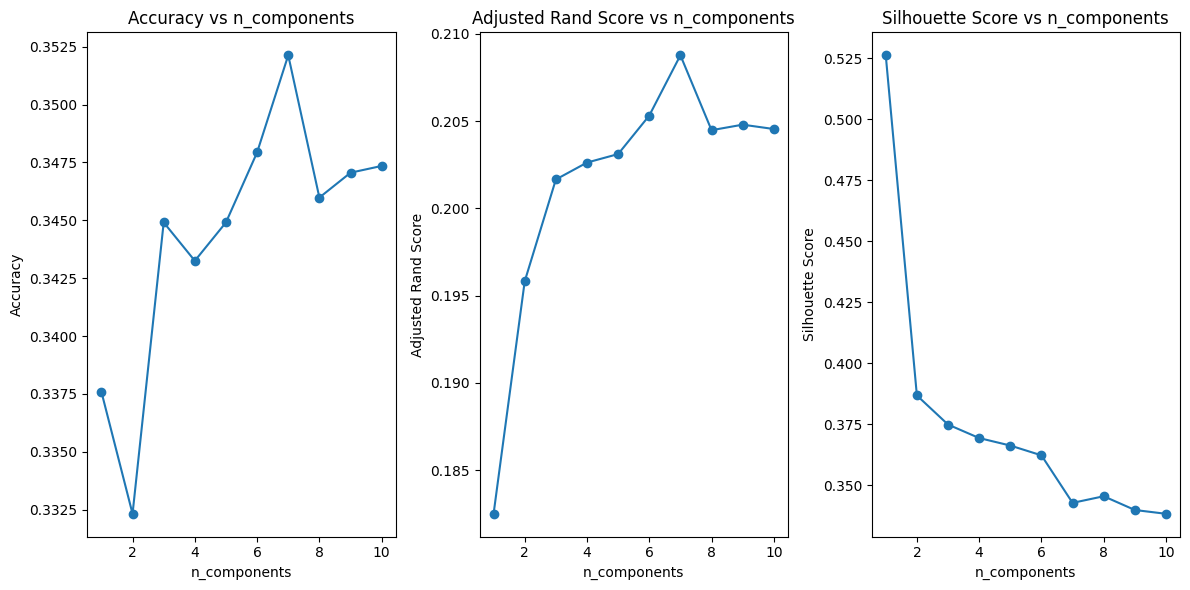

In [20]:
n_components_range = range(1, 11)

# Lists to store metrics for each n_components
accuracy_scores = []
rand_scores = []
silhouette_scores = []

for n_components in n_components_range:
    # Apply PCA with the current value of n_components
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(image1_2d_masked)

    # Apply k-means on the reduced dimensionality data
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
    labels_pca = kmeans_pca.fit_predict(pca_result)

    # Evaluate the clustering results after PCA
    translated_labels_pca = translate_predicted_labels(labels_pca, image2_2d)

    # Compute metrics
    acc_pca = accuracy_score(image2_2d, translated_labels_pca)
    rand_score_pca = adjusted_rand_score(image2_2d, labels_pca)
    sil_score_pca = silhouette_score(pca_result, labels_pca)

    # Append metrics to lists
    accuracy_scores.append(acc_pca)
    rand_scores.append(rand_score_pca)
    silhouette_scores.append(sil_score_pca)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 3, 1)
plt.plot(n_components_range, accuracy_scores, marker='o')
plt.title('Accuracy vs n_components')
plt.xlabel('n_components')
plt.ylabel('Accuracy')

# Plot Adjusted Rand Score
plt.subplot(1, 3, 2)
plt.plot(n_components_range, rand_scores, marker='o')
plt.title('Adjusted Rand Score vs n_components')
plt.xlabel('n_components')
plt.ylabel('Adjusted Rand Score')

# Plot Silhouette Score
plt.subplot(1, 3, 3)
plt.plot(n_components_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs n_components')
plt.xlabel('n_components')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Comments concerning the diagramms above:
Augmenting the n_components over a specific value will generally not result in big numerical differences in terms of the current metric. However, it seems that -in accuracy and adjusted rand score -the value of 3 is crucial in capturing the overwhelmingly biggest percentage of data. About the silhouette score: The Silhouette Score relies on the distances between instances within the same cluster and distances to instances in neighboring clusters. We observe that it is a decreasing function of n_components- as opposed to the 2 previous metrics; that is because instances in clusters are no longer as well-matched to their own clusters compared to neighboring clusters. The clusters are becoming less well-defined or more overlapped in the higher-dimensional representation that is provided with the increase of n_components (there are possibly even more parameters that confirm this).